<a href="https://colab.research.google.com/github/Crutchrailgun/My-Projects/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1:
Import Keras, TensorFlow, and other imports needed.

In [ ]:
#Date: 11.3.25
#Hours Spent: 8


#imports for a default training loop from TensorFlow
import tensorflow as tf
from tensorflow import keras
#Helper Libraries, graphing/images
import matplotlib.pyplot as plt


# STEP 2:
Import the MNIST Fashion datasets into Notebook



In [ ]:
FashionData = keras.datasets.fashion_mnist #MNIST Fashion Dataset

# STEP 3:
 Run exploratory data analyses on your datasets. Describe the datasets. How many samples are there? What are the characteristics of the samples (their shape)? Look at some of the data. Comment on how it is organized? This may have a bearing on what you do later. Look for anomalies.

In [ ]:

(TrainImages, TrainLabels), (TestImages, TestLabels) = FashionData.load_data() # Break Up Fashion Data into Training and Testing Images and Labels



#Training and Testing Images and Labels

#Tests to Show More Data

#60,000 Samples for training, 10,000 samples for testing, 28x28 (784 pixels total)

print(TrainImages.shape)# training images
print(TestImages.shape) # images

#Matching Number of Training Testing Labels which makes sense

print(TrainLabels.shape) #training labels
print(TestLabels.shape) #The shape of the testing labels

#Matching Data Type (uint8)
print(TrainImages.dtype)
print(TestImages.dtype)

#More Tests, Mean, Min, Max

#Mean is in between 0-255, which makes sense, given the greyscale
Mean = TrainImages.mean()
print(Mean)

#Highest value is White or 255
Max = TrainImages.max()
print(Max)

#Lowest value is Black or 0
Min = TrainImages.min()
print(Min)

StrangeData = TrainImages.std()
print(StrangeData)


print(TestLabels)
#Shows 0-9

#Class Names or Labels of objects from 0-9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']





(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
uint8
uint8
72.94035223214286
255
0
90.02118235130519
[9 2 1 ... 8 1 5]


There seem to be no anomalies. The dataset is a collection of images, none of which fall out of the structure of what's already been.

# STEP 4
Implement any modifications to the data to deal with the anomalies, if necessary. If none are necessary state that and why you made that decision.

Since there is no anomalies can observed, no modification will be done with the data outside of scaling (Step

#Step 5
You may need to convert the type of data structure containing each dataset depending on how you imported or loaded your data. If you do, comment on why.


Was not necessary, imported through keras with colab. No data structure issue.

#**Connected these steps due to the overlap of them code-wise.**

# STEP 6
Partition your training dataset into a training dataset and a validation dataset.
#STEP 7
Organize your training dataset into a label dataset and a feature dataset. Do you need to scale the data? If you need to do this, do so and comment on your reason.
#STEP 8
Repeat step 7 for validation dataset.
#STEP 9
Repeat step 7 for test dataset. Do you need to scale the dataset?


In [ ]:
#STEP 6, 7
(TrainImages, TrainLabels), (TestImages, TestLabels) = FashionData.load_data() # Break Up Fashion Data (Training) into Training and Testing (Valiidation) Datasets
#Traing Feature    Training Label Validation Feature, Validation Label



In [ ]:

#SCALING FOR 7,8,9
#Divide by 255.0 for improved processing (scale) (many sources have said this makes training easier for the feed forward network i.e., 1D array)

#Training
TrainImages = TrainImages / 255.0

#Again, scaling makes evaluation easier as well
#Validation
TestImages = TestImages / 255.0




# MY PROMPT:
Display 3 more training images
# Collab AI Response:
Sure, I can display 3 more training images for you. I'll add code to show the
first 4 images from the training set.


#STEP 10
 Generate a graphic display of a few (3 or 4) of the training data instances.

#Describes Knowledge of function (AI Usage)
Creates a base figure of 10x10

Just uses i as a loop until 4

Displays all needed *i*  images in a 2x2 grid, not outside of the range of the image number.

Toggles Grid Off

Adds ClassNames/Labels

Displays all needed i images

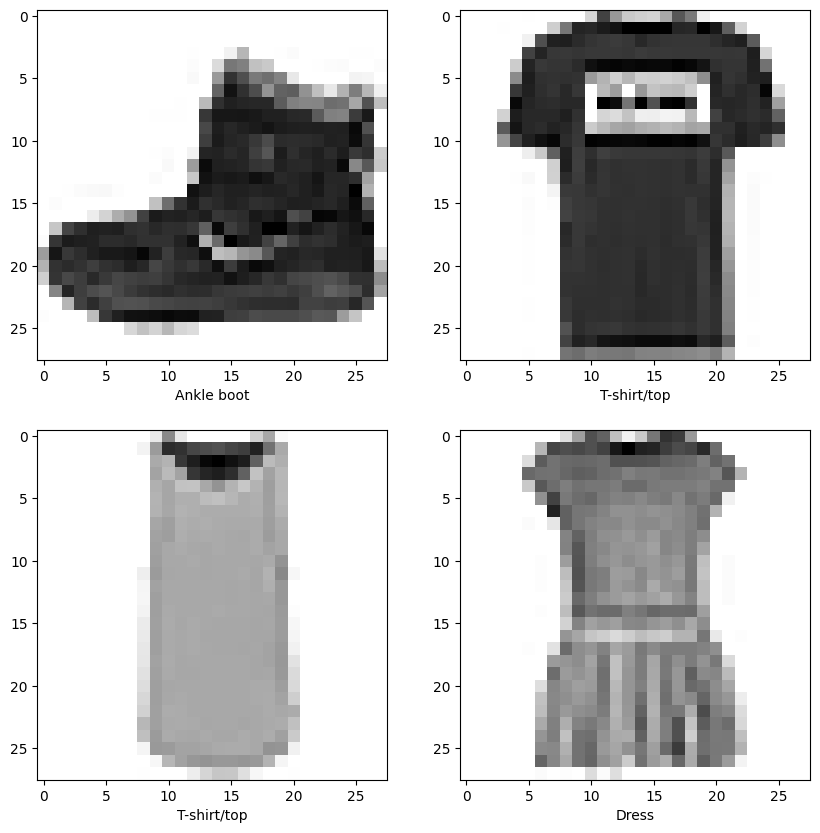

In [ ]:


plt.figure(figsize=(10,10))
for i in range(4): #Just uses i as a loop until 4
    plt.subplot(2,2,i+1) #Displays all needed i images in a 2x2 grid, not outside of the range of the image number.
    plt.grid(False) #Toggles Grid Off
    plt.imshow(TrainImages[i], cmap=plt.cm.binary) #Displays all needed i images
    plt.xlabel(class_names[TrainLabels[i]]) #Adds Above Labels

plt.show()

#STEP 11
Define a neural network model appropriate to your neural network training problem.



In [ ]:
#Feed Forward Model

model = tf.keras.models.Sequential([

    keras.Input(shape=(28,28)), #Input Layer
    keras.layers.Flatten(), #Flatten for the of case feed forward, giving 784 front neurons 11.8.25
    keras.layers.Dense(128, activation='relu'), #Hidden Later, Relu makes negative zero so good for percentages
    keras.layers.Dense(10, activation='softmax') #Output Layer, softmax good for


])


#STEP 12
Compile your model with the appropriate training parameters.



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #loss function best for classsifaction
              metrics=['accuracy']) #This is obvious, the goal is accuracy

#STEP 13
Train your model using your training data and your validation data. You will need to define the number of training epochs and explain why you choose that number.

In [ ]:
model.fit(TrainImages, TrainLabels, epochs= 22) #22 seem the best average between 20 and 25 for me,
# 20 might be not enough vs 25 which could be too much/pointless

Epoch 1/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7735 - loss: 0.6447
Epoch 2/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8627 - loss: 0.3857
Epoch 3/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8709 - loss: 0.3484
Epoch 4/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8864 - loss: 0.3132
Epoch 5/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8913 - loss: 0.3005
Epoch 6/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8925 - loss: 0.2854
Epoch 7/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9005 - loss: 0.2659
Epoch 8/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9036 - loss: 0.2617
Epoch 9/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9085 - loss: 0.2443
Epoch 10/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9090 - loss: 0.2448
Epoch 11/22
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9139 - loss: 0.2350
Epoch 12/22
1875/1875 ━━━━━━━━

#STEP 14
Display performance statistics produced by the training process.

In [ ]:
print("Training Performance Statistics")
trainLoss, trainAcc = model.evaluate(TrainImages, TrainLabels, verbose=1) #Displaying how it shows the statistics and evaluation.
print('Training accuracy percentage: {:.2%} '.format(trainAcc))


Training Performance Statistics
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9430 - loss: 0.1537
Training accuracy percentage: 94.20% 


#STEP 15
Comment on what step 14 tells you



From Step 14, the model seems be handling the data quite well at 20-25, epoches with low loss.

#STEP 16
Run your trained model using the test dataset. Generate and display performance statistics.

In [ ]:
testLoss, testAcc = model.evaluate(TestImages, TestLabels, verbose=1)

#Showing our performance statistics against Validation
print('Test accuracy percentage: {:.2%} '.format(testAcc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8885 - loss: 0.3628
Test accuracy percentage: 88.71% 


#STEP 17
 How well did the model do? Did it get better as training continued or did it plateau? Would you recommend it for deployment in the "real world"? If so, explain why. If not, why not?

#Model Results
It seems be overfitting, given its lower scores (88%) on the test/validation compared to due to the high scores it has on its training data (92-94%). I wouldn't recommend it for deployment in the real world, given how massive 2-4% difference can actually be.

#AI Usage Essay
1. It was relatively the same, given that a majority of the project was my internet research and other resources. Additionally, the context of use was primarily time and brain fog, particularly due to illness. In hindsight, I could have done that specific development myself, because after I used it, I immediately realized that it was just a "for loop".

*plt.imshow(TrainImages[i], cmap=plt.cm.binary)*

*plt.xlabel(class_names[TrainLabels[i]])*

***These two lines above were the only two lines that I wasn't immediately familiar with, but I figured out the usage pretty quickly through just commenting out one line at a time.***


2. The AI Tool usage didn't really affect my understanding/development, since I only used the tool on a relatively inconsequential part (displaying multiple images).

3. I would do AI development in the future. I found it really interesting to develop. I would make a conscious decision to not use AI TOOLS any more than I have to, because AI should be a tool, not a replacement for thinking.